In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open("/Users/nyaliwag/Downloads/transaction-data-adhoc-analysis.json") as f:
    data = pd.read_json(f, orient = "columns")  
data

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022/01/08
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10
4,"33911 Hansen Loaf\nWest Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2697,2022/01/24
...,...,...,...,...,...,...,...,...,...
83031,"96081 Harrison Brooks\nJenniferbury, MA 02124",2019/10/26,christina55@hotmail.com,Tammy Byrd,F,kmcconnell,"Exotic Extras,Kimchi and Seaweed,(x2);HealthyK...",3588,2022/06/05
83032,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Yummy Vegetables,(x1);Exotic Ext...",2095,2022/06/12
83033,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Orange Beans,(x4);Candy City,Gummy ...",3396,2022/06/15
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",4280,2022/06/09


In [3]:
#CODE OF TABLE 1
#split each item
single_datadf=data.assign(single_items=data.transaction_items.str.split(';')).explode('single_items')

#get the quantity of each item per order
# https://stackoverflow.com/questions/36505847/substring-of-an-entire-column-in-pandas-dataframe
single_datadf['quantity'] = single_datadf['single_items'].str[-2]

#turn quantity to int
# https://sparkbyexamples.com/pandas/pandas-convert-column-to-int/#:~:text=2.-,Convert%20Column%20to%20int%20(Integer),int64%20%2C%20numpy.
single_datadf["quantity"] = single_datadf["quantity"].astype('int')

#turn transdate to datetime format
# https://www.geeksforgeeks.org/how-to-filter-dataframe-rows-based-on-the-date-in-pandas/
single_datadf['transaction_date'] = pd.to_datetime(single_datadf['transaction_date'])

#make new column which only says the month 
# https://datascientyst.com/extract-month-and-year-datetime-column-in-pandas/
single_datadf['mm'] = pd.to_datetime(single_datadf['transaction_date']).dt.month

#get only the brand & item
single_datadf['items_name'] = single_datadf['single_items'].str[:-5]

single_datadf

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,single_items,quantity,mm,items_name
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022-01-12,"Exotic Extras,Beef Chicharon,(x4)",4,1,"Exotic Extras,Beef Chicharon"
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022-01-12,"Exotic Extras,Beef Chicharon,(x3)",3,1,"Exotic Extras,Beef Chicharon"
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022-01-12,"HealthyKid 3+,Nutrional Milk,(x4)",4,1,"HealthyKid 3+,Nutrional Milk"
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022-01-12,"Candy City,Orange Beans,(x1)",1,1,"Candy City,Orange Beans"
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022-01-08,"HealthyKid 3+,Gummy Vitamins,(x3)",3,1,"HealthyKid 3+,Gummy Vitamins"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",4280,2022-06-09,"HealthyKid 3+,Nutrional Milk,(x2)",2,6,"HealthyKid 3+,Nutrional Milk"
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",4280,2022-06-09,"Candy City,Gummy Worms,(x2)",2,6,"Candy City,Gummy Worms"
83035,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,"HealthyKid 3+,Nutrional Milk,(x1);Candy City,G...",2639,2022-06-03,"HealthyKid 3+,Nutrional Milk,(x1)",1,6,"HealthyKid 3+,Nutrional Milk"
83035,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,"HealthyKid 3+,Nutrional Milk,(x1);Candy City,G...",2639,2022-06-03,"Candy City,Gummy Worms,(x3)",3,6,"Candy City,Gummy Worms"


In [4]:
#TABLE 1
#group by month to gather all in the same month
table1_pivot=single_datadf.pivot_table("quantity", columns=["mm"],index='items_name', aggfunc='sum')
table1_pivot

mm,1,2,3,4,5,6
items_name,,,,,,
"Candy City,Gummy Worms",9559,9996,9986,10043,9801,9934
"Candy City,Orange Beans",9774,10037,9611,9914,9964,10106
"Exotic Extras,Beef Chicharon",9665,10001,9816,9890,10028,9902
"Exotic Extras,Kimchi and Seaweed",9676,9949,9967,9921,9773,10104
"HealthyKid 3+,Gummy Vitamins",9681,9980,10145,9842,9948,9980
"HealthyKid 3+,Nutrional Milk",9727,9691,9876,9786,9881,9767
"HealthyKid 3+,Yummy Vegetables",9959,10256,9896,9861,9735,9722


<AxesSubplot:title={'center':'Total Count of Items Sold per Month'}, xlabel='Items Name', ylabel='Count of Total Sold'>

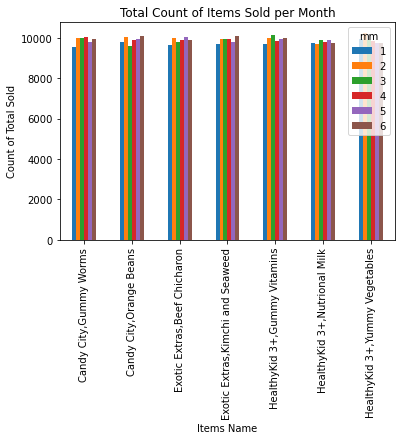

In [5]:
#TABLE 1 CHART
#https://stackoverflow.com/questions/50396479/create-a-plot-from-a-pandas-dataframe-pivot-table
table1chart=table1_pivot.plot(kind="bar")
plt.xlabel('Items Name')
plt.ylabel('Count of Total Sold')
plt.title('Total Count of Items Sold per Month')

table1chart

In [6]:
#CODE OF TABLE 2 
#getting the price of each item
price_df = single_datadf.copy()
price_df=price_df[["transaction_items", "quantity", "mm", "transaction_value"]]

price_df.loc[price_df['transaction_items'].str.contains(';'), 'single'] = 'duplicate'

#get the single item per order
#https://www.geeksforgeeks.org/how-to-drop-rows-in-dataframe-by-conditions-on-column-values/
index_price = price_df[ price_df['single'] == "duplicate" ].index

price_df.drop(index_price, inplace = True)

#get the brand & item
price_df['items_name'] = price_df['transaction_items'].str[:-5]

#remove duplicates
price_df=price_df.drop_duplicates(subset="items_name", keep="first")

#price per item
price_df["price_per_item"]=price_df["transaction_value"]/price_df["quantity"]

price_df

,transaction_items,quantity,mm,transaction_value,single,items_name,price_per_item
0,"Exotic Extras,Beef Chicharon,(x4)",4,1,5196,NaN,"Exotic Extras,Beef Chicharon",1299.0
3,"HealthyKid 3+,Yummy Vegetables,(x1)",1,1,500,NaN,"HealthyKid 3+,Yummy Vegetables",500.0
6,"Exotic Extras,Kimchi and Seaweed,(x4)",4,1,3196,NaN,"Exotic Extras,Kimchi and Seaweed",799.0
8,"Candy City,Gummy Worms,(x1)",1,1,150,NaN,"Candy City,Gummy Worms",150.0
11,"HealthyKid 3+,Gummy Vitamins,(x2)",2,1,3000,NaN,"HealthyKid 3+,Gummy Vitamins",1500.0
18,"HealthyKid 3+,Nutrional Milk,(x3)",3,1,5970,NaN,"HealthyKid 3+,Nutrional Milk",1990.0
19,"Candy City,Orange Beans,(x3)",3,1,597,NaN,"Candy City,Orange Beans",199.0


In [7]:
price_df[["items_name", "price_per_item"]]

,items_name,price_per_item
0,"Exotic Extras,Beef Chicharon",1299.0
3,"HealthyKid 3+,Yummy Vegetables",500.0
6,"Exotic Extras,Kimchi and Seaweed",799.0
8,"Candy City,Gummy Worms",150.0
11,"HealthyKid 3+,Gummy Vitamins",1500.0
18,"HealthyKid 3+,Nutrional Milk",1990.0
19,"Candy City,Orange Beans",199.0


In [8]:
#merging tables to put the price of each item 
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html
merged_df=single_datadf.merge(price_df, how='left', on='items_name')

#to clean up the table, i decided to delete duplicated data 
#https://stackoverflow.com/questions/14984119/python-pandas-remove-duplicate-columns
merged_df.T.drop_duplicates().T

#remove unnecessary columns
#https://www.educative.io/answers/how-to-delete-a-column-in-pandas
merged_df.drop('quantity_y', inplace=True, axis=1)
merged_df.drop('mm_y', inplace=True, axis=1)
merged_df.drop('transaction_value_y', inplace=True, axis=1)
merged_df.drop('single', inplace=True, axis=1)

#get the price of the item per customer order
merged_df["itemorder_price"]=merged_df["quantity_x"]*merged_df["price_per_item"]


merged_df

,address,birthdate,mail,name,sex,username,transaction_items_x,transaction_value_x,transaction_date,single_items,quantity_x,mm_x,items_name,transaction_items_y,price_per_item,itemorder_price
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022-01-12,"Exotic Extras,Beef Chicharon,(x4)",4,1,"Exotic Extras,Beef Chicharon","Exotic Extras,Beef Chicharon,(x4)",1299.0,5196.0
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022-01-12,"Exotic Extras,Beef Chicharon,(x3)",3,1,"Exotic Extras,Beef Chicharon","Exotic Extras,Beef Chicharon,(x4)",1299.0,3897.0
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022-01-12,"HealthyKid 3+,Nutrional Milk,(x4)",4,1,"HealthyKid 3+,Nutrional Milk","HealthyKid 3+,Nutrional Milk,(x3)",1990.0,7960.0
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022-01-12,"Candy City,Orange Beans,(x1)",1,1,"Candy City,Orange Beans","Candy City,Orange Beans,(x3)",199.0,199.0
4,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022-01-08,"HealthyKid 3+,Gummy Vitamins,(x3)",3,1,"HealthyKid 3+,Gummy Vitamins","HealthyKid 3+,Gummy Vitamins,(x2)",1500.0,4500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166114,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",4280,2022-06-09,"HealthyKid 3+,Nutrional Milk,(x2)",2,6,"HealthyKid 3+,Nutrional Milk","HealthyKid 3+,Nutrional Milk,(x3)",1990.0,3980.0
166115,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",4280,2022-06-09,"Candy City,Gummy Worms,(x2)",2,6,"Candy City,Gummy Worms","Candy City,Gummy Worms,(x1)",150.0,300.0
166116,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,"HealthyKid 3+,Nutrional Milk,(x1);Candy City,G...",2639,2022-06-03,"HealthyKid 3+,Nutrional Milk,(x1)",1,6,"HealthyKid 3+,Nutrional Milk","HealthyKid 3+,Nutrional Milk,(x3)",1990.0,1990.0
166117,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,"HealthyKid 3+,Nutrional Milk,(x1);Candy City,G...",2639,2022-06-03,"Candy City,Gummy Worms,(x3)",3,6,"Candy City,Gummy Worms","Candy City,Gummy Worms,(x1)",150.0,450.0


In [9]:
#TABLE 2
merged_pivot=merged_df.pivot_table("itemorder_price", columns=["mm_x"],index='items_name', aggfunc='sum')
merged_pivot

mm_x,1,2,3,4,5,6
items_name,,,,,,
"Candy City,Gummy Worms",1433850.0,1499400.0,1497900.0,1506450.0,1470150.0,1490100.0
"Candy City,Orange Beans",1945026.0,1997363.0,1912589.0,1972886.0,1982836.0,2011094.0
"Exotic Extras,Beef Chicharon",12554835.0,12991299.0,12750984.0,12847110.0,13026372.0,12862698.0
"Exotic Extras,Kimchi and Seaweed",7731124.0,7949251.0,7963633.0,7926879.0,7808627.0,8073096.0
"HealthyKid 3+,Gummy Vitamins",14521500.0,14970000.0,15217500.0,14763000.0,14922000.0,14970000.0
"HealthyKid 3+,Nutrional Milk",19356730.0,19285090.0,19653240.0,19474140.0,19663190.0,19436330.0
"HealthyKid 3+,Yummy Vegetables",4979500.0,5128000.0,4948000.0,4930500.0,4867500.0,4861000.0


<AxesSubplot:title={'center':'Total Sales Value per Month'}, xlabel='Items Name', ylabel='Total Sale Value'>

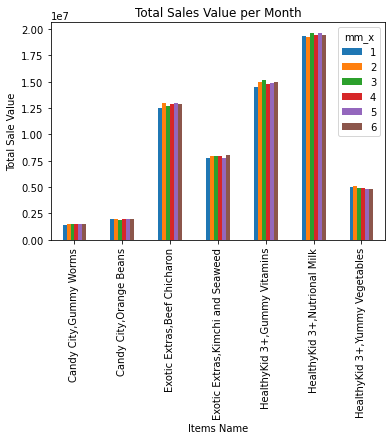

In [10]:
table2chart=merged_pivot.plot(kind="bar")
plt.xlabel('Items Name')
plt.ylabel('Total Sale Value')
plt.title('Total Sales Value per Month')

table2chart

In [11]:
#FINAL TABLE
summary_df=single_datadf.copy()

In [12]:
#make a pivot table to get the total count of store visits the customer makes 
summary_pivot=summary_df.pivot_table("mail", columns=["mm"],index='name', aggfunc='count', fill_value="0")

In [13]:
summary_pivot

mm,1,2,3,4,5,6
name,,,,,,
Aaron Beasley,0,0,0,4.0,3.0,1.0
Aaron Brewer,2.0,2.0,1.0,3.0,0,5.0
Aaron Brown,0,0,5.0,5.0,3.0,1.0
Aaron Coffey,1.0,3.0,4.0,4.0,5.0,0
Aaron Davis,2.0,1.0,0,6.0,8.0,5.0
...,...,...,...,...,...,...
Zachary Valentine,3.0,3.0,3.0,2.0,5.0,8.0
Zachary Ware,3.0,4.0,6.0,2.0,7.0,4.0
Zachary Williams,10.0,8.0,7.0,5.0,0,0


In [14]:
#repeaters
#purchase this month and the previous month 
#ill try to make it into a dataframe first because its easier to manipulate 
#https://www.statology.org/pandas-pivot-table-to-dataframe/

summary2_df = summary_pivot.reset_index()

#adding column names
summary2_df.columns = ['Name', 'January', 'February','March', 'April', 'May', 'June']

#customers per month summary
summary2_df.loc[summary2_df['January'].str.contains('0', na=False), 'Jan_Customer'] = 'No'
summary2_df.loc[~summary2_df['January'].str.contains('0', na=False), 'Jan_Customer'] = 'Yes'
summary2_df.loc[summary2_df['February'].str.contains('0', na=False), 'Feb_Customer'] = 'No'
summary2_df.loc[~summary2_df['February'].str.contains('0', na=False), 'Feb_Customer'] = 'Yes'
summary2_df.loc[summary2_df['March'].str.contains('0', na=False), 'Mar_Customer'] = 'No'
summary2_df.loc[~summary2_df['March'].str.contains('0', na=False), 'Mar_Customer'] = 'Yes'
summary2_df.loc[summary2_df['April'].str.contains('0', na=False), 'Apr_Customer'] = 'No'
summary2_df.loc[~summary2_df['April'].str.contains('0', na=False), 'Apr_Customer'] = 'Yes'
summary2_df.loc[summary2_df['May'].str.contains('0', na=False), 'May_Customer'] = 'No'
summary2_df.loc[~summary2_df['May'].str.contains('0', na=False), 'May_Customer'] = 'Yes'
summary2_df.loc[summary2_df['June'].str.contains('0', na=False), 'Jun_Customer'] = 'No'
summary2_df.loc[~summary2_df['June'].str.contains('0', na=False), 'Jun_Customer'] = 'Yes'

#get another summary
summary2_df['1'] = np.count_nonzero(summary2_df.iloc[:,6:8] == 'Yes', axis=1)
summary2_df['2'] = np.count_nonzero(summary2_df.iloc[:,7:9] == 'Yes', axis=1)
summary2_df['3'] = np.count_nonzero(summary2_df.iloc[:,8:10] == 'Yes', axis=1)
summary2_df['4'] = np.count_nonzero(summary2_df.iloc[:,9:11] == 'Yes', axis=1)
summary2_df['5'] = np.count_nonzero(summary2_df.iloc[:,10:12] == 'Yes', axis=1)
summary2_df['6'] = np.count_nonzero(summary2_df.iloc[:,11:13] == 'Yes', axis=1)

#sum
repeater = summary2_df.iloc[:,13:19][summary2_df.iloc[:,13:19]==2].count()
repeater

1       0
2    5172
3    5216
4    5154
5    5110
6    5193
dtype: int64

In [15]:
#engaged
summary3_df=summary2_df.copy()
summary3_df=summary3_df.drop(summary3_df.loc[:, 'January':'June'].columns, axis=1)
summary3_df=summary3_df.drop(summary3_df.loc[:, '1':'6'].columns, axis=1)

#engaged per month
summary3_df['Jan_Engaged_Count'] = (summary3_df[['Jan_Customer']] == 'Yes').sum(axis=1)
summary3_df['Feb_Engaged_Count'] = (summary3_df.iloc[:,1:3] == 'Yes').sum(axis=1)
summary3_df['Mar_Engaged_Count'] = (summary3_df.iloc[:,1:4] == 'Yes').sum(axis=1)
summary3_df['April_Engaged_Count'] = (summary3_df.iloc[:,1:5] == 'Yes').sum(axis=1)
summary3_df['May_Engaged_Count'] = (summary3_df.iloc[:,1:6] == 'Yes').sum(axis=1)
summary3_df['Jun_Engaged_Count'] = (summary3_df.iloc[:,1:7] == 'Yes').sum(axis=1)

#engaged count
summary3_df['1'] = np.where((summary3_df['Jan_Engaged_Count'] == 1), 1, 0)
summary3_df['2'] = np.where((summary3_df['Feb_Engaged_Count'] == 2) , 1, 0)
summary3_df['3'] = np.where((summary3_df['Mar_Engaged_Count'] == 3) , 1, 0)
summary3_df['4'] = np.where((summary3_df['April_Engaged_Count'] == 4) , 1, 0)
summary3_df['5'] = np.where((summary3_df['May_Engaged_Count'] == 5) , 1, 0)
summary3_df['6'] = np.where((summary3_df['Jun_Engaged_Count'] == 6) , 1, 0)

engaged = summary3_df.iloc[:,13:19].sum()
engaged

1    6588
2    5172
3    4126
4    3289
5    2667
6    2190
dtype: int64

In [16]:
#inactive
#current month is 0
#before months >0
#https://www.analyticsvidhya.com/blog/2020/03/what-are-lambda-functions-in-python/
summary4_df=summary3_df.drop(summary3_df.loc[:, 'Jan_Engaged_Count':'6'].columns, axis=1)

#get per month data
summary4_df['1'] = np.where((summary4_df['Jan_Customer'] == 'No') & (summary4_df['Name'] == 'Yes'), 1, 0)
summary4_df['2'] = np.where((summary4_df['Feb_Customer'] == 'No') & (summary4_df['Jan_Customer'] == 'Yes'), 1, 0)
summary4_df['3'] = np.where((summary4_df['Mar_Customer'] == 'No') & ((summary4_df['Jan_Customer'] == 'Yes') | (summary4_df['Feb_Customer'] == 'Yes')) , 1, 0)
summary4_df['4'] = np.where((summary4_df['Apr_Customer'] == 'No') & ((summary4_df['Jan_Customer'] == 'Yes') | (summary4_df['Feb_Customer'] == 'Yes') | (summary4_df['Mar_Customer'] == 'Yes')) , 1, 0)
summary4_df['5'] = np.where((summary4_df['May_Customer'] == 'No') & ((summary4_df['Jan_Customer'] == 'Yes') | (summary4_df['Feb_Customer'] == 'Yes') | (summary4_df['Mar_Customer'] == 'Yes') | (summary4_df['Apr_Customer'] == 'Yes')) , 1, 0)
summary4_df['6'] = np.where((summary4_df['Jun_Customer'] == 'No') & ((summary4_df['Jan_Customer'] == 'Yes') | (summary4_df['Feb_Customer'] == 'Yes') | (summary4_df['Mar_Customer'] == 'Yes') | (summary4_df['Apr_Customer'] == 'Yes') | (summary4_df['May_Customer'] == 'Yes')) , 1, 0)


inactive = summary4_df.iloc[:,7:13].sum()
inactive

1       0
2    1416
3    1747
4    1909
5    1917
6    1835
dtype: int64

In [17]:
#make a dataframe finally
finalreport=pd.DataFrame({
    'repeater': repeater,
    'inactive': inactive,
    'engaged' : engaged
})

finalreport=finalreport.T
finalreport

,1,2,3,4,5,6
repeater,0,5172,5216,5154,5110,5193
inactive,0,1416,1747,1909,1917,1835
engaged,6588,5172,4126,3289,2667,2190


<AxesSubplot:title={'center':'Monthly Count of Customer Status'}, xlabel='Customer Status', ylabel='Number of Customers'>

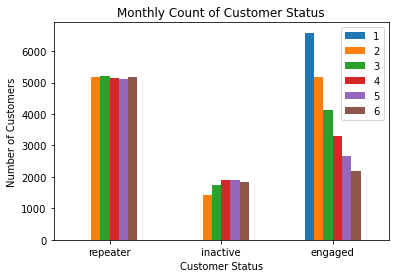

In [18]:
summary_chart = finalreport.plot(kind='bar')
plt.xlabel('Customer Status')
plt.ylabel('Number of Customers')
summary_chart.set_xticklabels(finalreport.index)
plt.setp(plt.gca().get_xticklabels(), rotation=0, horizontalalignment='center')
plt.title('Monthly Count of Customer Status')

summary_chart